# Assignment 3

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [14]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from numpy.random import randint
from skimage import io
from ipywidgets import interact
from matplotlib.patches import Ellipse
import math

ModuleNotFoundError: No module named 'skimage'

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

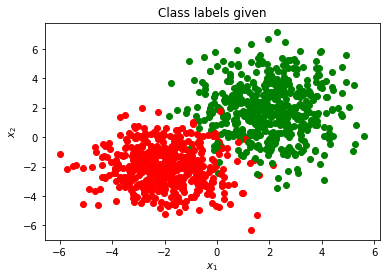

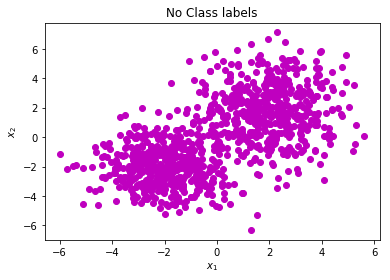

In [15]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## K-means

Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.

**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

[[ 0.50192706  1.20852674]
 [-2.60967961 -1.22025091]
 [ 2.32952693  3.60859769]
 [ 2.82881007  0.1518148 ]
 [-1.54136632 -3.20475234]]


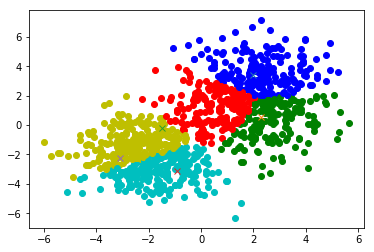

In [133]:
from sklearn.cluster import KMeans

py_kmeans = KMeans(5, init = 'k-means++')
y_predi = py_kmeans.fit_predict(X.transpose())
print(py_kmeans.cluster_centers_)

c = ["ro", "yo", "bo", "go", "co", "mo", "ko", "wo", "rx", "yx", "bx", "gx", "cx", "mx", "kx", "wx"]
for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y_predi[k]])
for k in range(len(means)):
    plt.plot(means[k,0],means[k,1],"x")

[[ 2.90194635  0.20811755]
 [ 2.24771994  3.55410735]
 [-2.62709822 -1.2354403 ]
 [-1.5389849  -3.20963996]
 [ 0.46635219  0.99811527]]


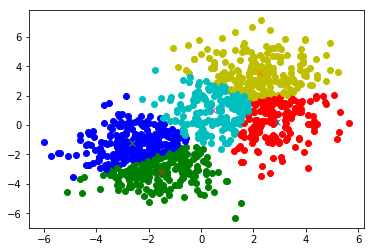

In [79]:
means, labels = k_means(X, 5)

c = ["ro", "yo", "bo", "go", "co", "mo", "ko", "wo", "rx", "yx", "bx", "gx", "cx", "mx", "kx", "wx"]
for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[labels[k]])
for k in range(len(means)):
    plt.plot(means[k,0],means[k,1],"x")

In [171]:
def k_means(data, k) :
    cluster_count = 2
    done = 1
    J = 0
    J_old = 0
    
    means = np.matrix([X[:,5], X[:,1]])
    
    labels = assign(data, means)
    
    while (cluster_count < k) :
        labels = assign(data, means)
        means = new_means(data, means, labels)
        means = add_mean(data, means, labels)
        cluster_count = cluster_count + 1
    
    labels = assign(data, means)
    while (done == 1) :
        J_old = J
        means = new_means(data, means, labels)
        labels = assign(data, means)
        J = J_calc(data, means, labels)
        if ((J - J_old) * (J - J_old) < math.exp(-6)) :
            done = 0
    return means, labels

In [109]:
def new_means(data, means, labels) :
    
    count = np.array([0] * len(means))
    new_means = np.matrix([[0.0, 0.0]] * len(means))
    for i in range(len(data[0])) :
        count[labels[i]] = count[labels[i]] + 1
        for n in range(len(data[:,0])) :
            new_means[labels[i], n] = new_means[labels[i], n] + data[n][i]
    
    x = 0
    for i in range(len(new_means)) :
        for j in range(len(data[:,0])) :
            x = new_means[i, j]/count[i]
            new_means[i, j] = x
    return new_means

In [110]:
import math
def J_calc(data, means, labels) :
    J = 0
    
    for i in range(len(data[0])) :
        jval = 0
        for n in range(len(data[:,0])) :
            jval = jval + (data[n][i] - means[labels[i], n]) * (data[n][i] - means[labels[i], n])
        jval = math.sqrt(jval)
        J = J + jval
    return J        

In [111]:
import math
import random
def add_mean(data, means, labels) :
    
    count = np.array([0] * len(means))
    covs = np.matrix([[0.0, 0.0]] * len(means))
    for i in range(len(data[0])) :
        count[labels[i]] = count[labels[i]] + 1
        for n in range(len(data[:,0])) :
            covs[labels[i], n] = covs[labels[i], n] + (means[labels[i], n] - data[n][i]) * (means[labels[i], n] - data[n][i])
    
    x = 0
    for i in range(len(covs)) :
        for j in range(len(data[:,0])) :
            x = covs[i, j]/count[i]
            covs[i, j] = x
    
    index = 0
    max_d = 0
    for i in range(len(covs)) :
        d = 0
        for j in range(len(covs[0])) :
            d = d + covs[i, j]*covs[i, j]
        d = math.sqrt(d)
        if d > max_d :
            max_d = d
            index = i
    
    lab = []
    for i in range(len(data[0])) :
        if index == labels[i] :
            lab.append(i)
            
    i1 = random.randint(0, len(lab))
    i2 = random.randint(0, len(lab))
    means[index] = data[:,i1]
    means = np.concatenate((means, [data[:,i2]]))
    
    return means 

In [112]:
import math
def assign(data, means) :
    labels = np.array([0] * len(data[0]))
    for n in range(len(data[0])) :
        distance = [0] * len(means)
        for m in range(len(means)) :
            dist = 0
            for r in range(len(X[:,0])) :
                dist = dist + (data[r][n] - means[m, r]) * (data[r][n] - means[m, r])
            dist = math.sqrt(dist)
            distance[m] = dist
        labels[n] = distance.index(min(distance))
    
    return labels

********************
[1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1]
********************
[1 1 0 0 0 1 1 1 2 1 1 0 1 2 0 1 1 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 0 1 0 0 1
 0 1 1 0 1 1 0 0 2 2 1 1 2 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 2 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 2 0 1 2 2 1]


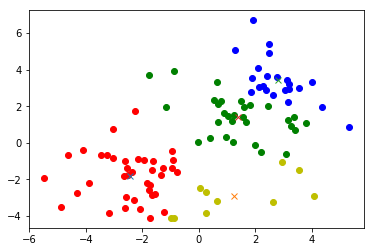

In [141]:
count = 2
k = 4
done = 1
Y = X[:,0:100]
means = np.matrix([X[:,2], X[:,1]])
    
labels = assign(Y, means)
J = 0

while count < k :
    print("*"*20)
    labels = assign(Y, means)
    print(labels)
    means = new_means(Y, means, labels)
    means = add_mean(Y, means, labels)
    count = count + 1

labels = assign(Y, means)
while (done == 1) :
    J_old = J
    means = new_means(Y, means, labels)
    labels = assign(Y, means)
    J = J_calc(Y, means, labels)
    if ((J - J_old) * (J - J_old) < math.exp(-6)) :
        done = 0

c = ["r", "y", "b", "g"]
for k in range(Y.shape[1]):
    plt.plot(Y[0,k],Y[1,k],c[labels[k]]+"o")
for k in range(len(means)):
    plt.plot(means[k,0],means[k,1],"x")

In [ ]:
display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

## GMM

Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.

**Use your newly created function to cluster the above generated data set. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

[[ 2.61764972  1.60524174]
 [-2.27834113 -1.3041718 ]
 [ 1.24906196  0.36247602]
 [-1.72911556 -3.02474544]
 [ 2.02122628  3.37445619]]
[[[ 1.24245607 -0.3742181 ]
  [-0.3742181   1.53643581]]

 [[ 1.31875013  0.22105494]
  [ 0.22105494  1.30221252]]

 [[ 1.53644651 -0.69518164]
  [-0.69518164  2.03450509]]

 [[ 1.64227239 -0.17095252]
  [-0.17095252  1.04376733]]

 [[ 1.76748444  0.18526131]
  [ 0.18526131  1.88191284]]]


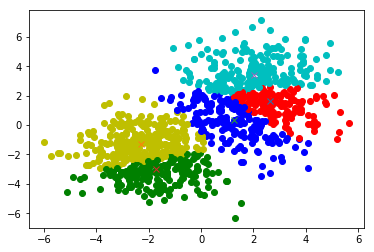

In [19]:
from sklearn import mixture
py_gmm = mixture.GaussianMixture(n_components=5)

y_pred = py_gmm.fit_predict(X.transpose())

c = ["ro", "yo", "bo", "go", "co", "mo", "ko", "wo", "rx", "yx", "bx", "gx", "cx", "mx", "kx", "wx"]
for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y_pred[k]])
py_gmm_means = py_gmm.means_
py_gmm_cov = py_gmm.covariances_
print(py_gmm_means)
print(py_gmm_cov)
for k in range(len(py_gmm_means)):
    plt.plot(py_gmm_means[k,0],py_gmm_means[k,1],"x")

In [192]:
means, covariances, labels = gmm(X, 2)
print(means)
#c = ["ro", "yo", "bo", "go", "co", "mo", "ko", "wo", "rx", "yx", "bx", "gx", "cx", "mx", "kx", "wx"]
#for k in range(X.shape[1]):
#    plt.plot(X[0,k],X[1,k],c[labels[k]])
#for k in range(len(means)):
#    plt.plot(means[k,0],means[k,1],"x")

-4208.007390890052
-4203.585143648619
-4202.539920671436
-4202.103994523097
-4201.884792488222
-4201.7680891881055
-4201.704974767582
-4201.670688209958
-4201.652030798995
-4201.641868341807
-4201.63632896335
-4201.633307778068
[[-2.06596342 -2.00101218]
 [ 1.94453612  1.8237313 ]]


66.83691660942654
-0.7171465704903791


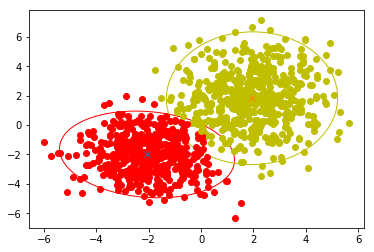

In [64]:
class1 = np.zeros(shape = (1, len(X[:,0])))
class2 = np.zeros(shape = (1, len(X[:,0])))
for i in range(X.shape[1]) :
    if labels[i] == 0 :
        class1 = np.vstack((class1, X[:,i]))
    if labels[i] == 1 :
        class2 = np.vstack((class2, X[:,i]))
cov1 = np.cov(class1.transpose())
cov2 = np.cov(class2.transpose())
eig1, e1 = np.linalg.eig(cov1)
eig2, e2 = np.linalg.eig(cov2)


ax = plt.gca()
a1 = np.arctan(e1[0,0]/e1[1,0]) * 180 / math.pi
print(a1)
ells = Ellipse(means[0], 2 * math.sqrt(5.991 * eig1[0]), 2 * math.sqrt(5.991 * eig1[1]), a1, edgecolor="r", facecolor='none')
ax.add_patch(ells)

a2 = - np.arctan(e2[0,1]/e2[1,1]) * 180 / math.pi
print(a2)
ells = Ellipse(means[1], 2 * math.sqrt(5.991 * eig2[0]), 2 * math.sqrt(5.991 * eig2[1]), a2, edgecolor="y", facecolor='none')
ax.add_patch(ells)
#for k in range(len(bounds)) :
#    ells = Ellipse(means[k], 2*(means[k, 0] - bounds[k, 0, 0]), 2*(means[k, 0] - bounds[k, 0, 0]), 0)
#    ax.add_patch(ells)

In [191]:
def gmm(data, k) :
    
    means, labels = k_means(data, k)
    
    covariances = init_cov(data, means, labels)
    weights = [0] * len(means)
    total = 0

    for i in range(len(data[0])) :
        total = total + 1
        weights[labels[i]] = weights[labels[i]] + 1
    for i in range(len(weights)) :
        weights[i] = weights[i] / total
    
    likelihood_old = 0
    likelihood = log_like(data, means, covariances, weights)
    
    while (abs(likelihood - likelihood_old) > math.exp(-6)) :
        print(likelihood)
        likelihood_old = likelihood
        responsibility = resp(data, means, covariances, weights)
        means, covariances, weights = maximize(data, responsibility)
        likelihood = log_like(data, means, covariances, weights)
    
    labels = assign_gmm(data, responsibility)
    return means, covariances, labels

In [183]:
Y = X[:,0:500]

means, labels = k_means(Y, 2)
covariances = init_cov(Y, means, labels)



#[[[ 1.55980318 -0.11272028]
#  [-0.11272028  1.94580378]]

# [[ 1.79199534  0.03524072]
#  [ 0.03524072  3.46379761]]]


[[[ 1.73087057 -0.17996406]
  [-0.17996406  1.84533948]]

 [[ 1.82448601 -0.19649274]
  [-0.19649274  3.16713153]]]


In [157]:
def init_cov(data, means, labels) :  
    covariances = np.zeros(shape = (len(means), len(data[:,0]), len(data[:,0])))
    
    numbers = [0] * len(means)
    for x in range(len(data[0])) :
        xn = np.matrix([data[:,x]])
        un = means[labels[x]]
        d = xn - un
        cov = np.matmul(d.transpose(), d)
        covariances[labels[x]] = covariances[labels[x]] + cov
        numbers[labels[x]] = numbers[labels[x]] + 1
    
    for i in range(len(covariances)) :
        covariances[i] = covariances[i] / numbers[i]
    
    for i in range(len(covariances)) : 
        covariances[i] = np.cov(means[i])
    
    return covariances

In [154]:
def assign_gmm(data, responsibility) :
    labels = [0] * len(data[0])
    for i in range(len(data[0])) :
        index = 0
        r_max = 0
        for r in range(len(responsibility[i])) :
            if responsibility[i, r] > r_max :
                r_max = responsibility[i, r]
                index = r
        labels[i] = index
    return labels

In [155]:
def log_like(data, means, covariances, weights) :
    final = 0
    for n in range(len(data[0])) :
        ln = 0
        for i in range(len(weights)) :
            val = norm(means[i], covariances[i], data[:,n])
            ln = ln + val * weights[i]
        final = final + np.log(ln)
    return final

In [156]:
def maximize(data, responsibility) :
    Nj = [0] * len(responsibility[0])
    for i in range(len(responsibility)) :
        for j in range(len(responsibility[0])) :
            Nj[j] = Nj[j] + responsibility[i][j]
            
    means = np.zeros(shape = (len(responsibility[0]), len(data[:,0])))
    for i in range(len(responsibility)) :
        for j in range(len(responsibility[0])) :
            means[j] = means[j] + responsibility[i, j] * data[:, i]
    for j in range(len(responsibility[0])) :
        means[j] = means[j] / Nj[j]
    
    covariances = np.zeros(shape = (len(means), len(data[:,0]), len(data[:,0])))
    for i in range(len(responsibility)) :
        xn = np.matrix([data[:,i]])
        for j in range(len(responsibility[0])) :
            u = means[j]
            d = xn - u
            cov = np.matmul(d.transpose(), d) * responsibility[i, j]
            covariances[j] = covariances[j] + cov
    for i in range(len(covariances)) :
        covariances[i] = covariances[i] / Nj[i]
    
    weights = [0] * len(means)
    for i in range(len(weights)) :
        weights[i] = Nj[i] / len(data[0])
    
    #print(means)
    #print(covariances)
    #print(weights)
    return means, covariances, weights

In [158]:
def norm(mean, cov, x) :
    d = x - mean
    cov_i = np.linalg.inv(cov)
    
    exp_s = np.matmul(d, cov_i)
    exp_s = np.matmul(exp_s, d.transpose())
    exp_s = math.exp((-0.5) * exp_s)
    
    frac = math.pow(2 * math.pi, len(x) / 2.0)
    frac = frac * math.pow(np.linalg.det(cov), 0.5)
    
    n = exp_s / frac
    
    return n

In [184]:
def resp(data, means, covariances, weights) :
    resp = np.zeros(shape = (len(data[0]), len(means)))
    
    for i in range(len(resp)) :
        total = 0
        for j in range(len(resp[0])) :
            w = weights[j] * norm(means[j], covariances[j], data[:,i])
            total = total + w
            resp[i, j] = w
        for j in range(len(resp[0])) :
            resp[i, j] = resp[i, j] / total
    return resp

In [160]:
def get_conf_interval(means, covariances) :
    bounds = np.zeros(shape = (len(means), len(means[0]), 2))
    for i in range(len(means)) :
        for j in range(len(means[i])) :
            upper = means[i, j] + 1.96 * math.sqrt(covariances[i, j, j])
            lower = means[i, j] - 1.96 * math.sqrt(covariances[i, j, j])
            bounds[i, j, 0] = lower
            bounds[i, j, 1] = upper
    return bounds

In [2]:
from matplotlib.patches import Ellipse

Y = X[:,0:500]

means, labels = k_means(Y, 5)
covariances = init_cov(Y, means, labels)
weights = [0] * len(means)
total = 0
for i in range(len(Y[0])) :
    total = total + 1
    weights[labels[i]] = weights[labels[i]] + 1
for i in range(len(weights)) :
    weights[i] = weights[i] / total

likelihood_old = 0
likelihood = log_like(Y, means, covariances, weights)

while (abs(likelihood - likelihood_old) > math.exp(-6)) :
    likelihood_old = likelihood
    responsibility = weight(Y, means, covariances, weights)
    means, covariances, weights = maximize(Y, responsibility)
    likelihood = log_like(Y, means, covariances, weights)
  
labels = assign_gmm(Y, responsibility)
bounds = get_conf_interval(means, covariances)
print(bounds)

c = ["ro", "yo", "bo", "go", "co", "mo", "ko", "wo", "rx", "yx", "bx", "gx", "cx", "mx", "kx", "wx"]
for k in range(Y.shape[1]):
    plt.plot(Y[0,k],Y[1,k],c[labels[k]])
for k in range(len(means)):
    plt.plot(means[k,0],means[k,1],"x")
ax = plt.gca()
for k in range(len(bounds)) :
    ells = Ellipse(means[k], 2*(means[k, 0] - bounds[k, 0, 0]), 2*(means[k, 0] - bounds[k, 0, 0]), 0)
    ax.add_patch(ells)

NameError: name 'X' is not defined

In [178]:
matplotlib.patches.Ellipse?

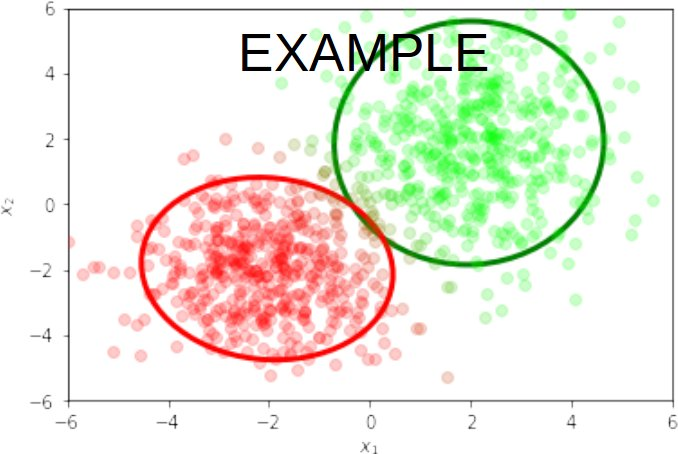

In [68]:
display(Image(filename='./gmm.jpg'))

# Perform K-means on an image

In [11]:
from PIL import Image
im = Image.open('./cartoon.png') # Can be many different formats.
im_rgb = im.convert("RGB")
print(im_rgb.getpixel((0,0)))


for i in range(255) :
    

(255, 255, 255)


## Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

In [7]:
from sklearn.cluster import KMeans

py_kmeans = KMeans(3, init = 'k-means++')
print(len(list(im.getdata())))

50625


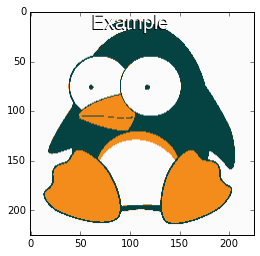

In [11]:
display(Image(filename='./wm_cartoon_repro.png'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [23]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())
print(digits.data[0])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

10


## Inspect the different digit  images

In [22]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


## GMM

Next, fit the data to a 10 component GMM model, using the scikit-learn package.

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

In [196]:
data = digits.data

from sklearn import mixture
py_gmm = mixture.GaussianMixture(n_components=10)
py_gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [204]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(num_means[k].reshape(8,8))   
    plt.show()
w_show_digits = interact(show_digits, k =(0, 10)) 

In [208]:
#for k in range(10) :
#    plt.imshow(num_means[k].reshape(8,8))
#    plt.show()

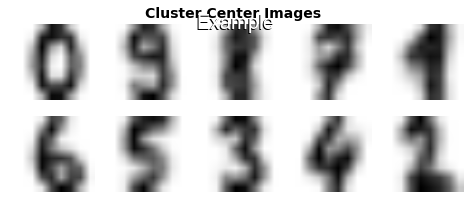

In [16]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

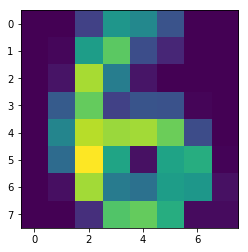

In [223]:
num_means = py_gmm.means_
num_cov = py_gmm.covariances_

x = np.random.multivariate_normal(num_means[3], num_cov[3])
plt.imshow(x.reshape(8,8))